I've tried a bunch of different ways to make circuit diagrams for exams, homework assignments and worksheets. I started out using PowerPoint and copying and pasting clip art together with lines from PowerPoint's shape drawing options. Then making text boxes with variable names. It was a pain. The lines had to be aligned and I kept having to group and ungroup elements when building more circuits.

Next I tried constructing the circuit diagrams in LT Spice. Making the circuit diagram was definely easier in LT Spice. The whole point of LT Spice is to design and analyze circuits. There was a steep learning curve compared to PowerPoint. Once I got the hang of using LT Spice, modifying a schematic was pretty easy. The problem was the final outputs didn't look great. When LT Spice diagrams were pasted into word or imported into LaTeX, the resulting diagrams looked low resolution.

Then it was on to LaTeX. There is a LaTeX package called ```circuitikz```. The circuit diagrams made with ```circuitikz``` looked really good (like most things in LaTeX). Once I understood how the coordinate system worked, I was able to construct a set of nice looking circuit diagrams. One issue was that the diagrams were coded direclty into a LaTeX file. I use sharelatex.com for my LaTeX work. It's currently where I keep and edit all the LaTeX code for the book. A minor annoyance is outputing the circuit diagrams for other purposes, like sharing with collegues or for use in Word documents. The circuit diagrams would have to be compiled and rendered as their own LaTeX article. 

In this post, I'm going to show the circuit diagrams I constructed in Python using the ```SchemDraw``` package. ```SchemDraw``` is a pip installable python package used to make circuit diagrams. It works great in jupyter notebooks too. I like the quick rendering and prototyping ability of using it in a jupyter notebook.

To install ```SchemDraw``` it is as simple as:

```
pip install SchemDraw
```

I installed it in a virtual environment using ```pip``` instead of ```conda``` because I couldn't find ```SchemDraw``` in any of the conda channels.

The code below starts out with importing matplotlib and calling ```%matplotlib inline```. You only need to use ```%matplotlib``` if you are using a jupyter notebook. There is also a line for making the images vector format on output. For web posting, .png's are fine, but I like the way vector graphics files look in print. In order to output high resolution graphic files, we need to make a change the  ```InlineBackend``` to the ```svg``` format.

```
%config InlineBackend.figure_format = 'svg'
```

In [1]:
import matplotlib.pyplot as plt
#plt.xkcd() #to make the diagram look hand drawn
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e

#### For documentation see:
https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html

The first diagram is going to be a simple one with just one resistor.  First we create a schemdraw object with ```schem.Drawing()```. Then we add an element to the drawing object with ```e.RES```. We display the drawing object with ```d.draw```.

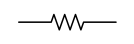

In [9]:
d = schem.Drawing()
d.add(e.RES)
d.draw()

We can add a label to our resistor by adding the ```label='label name'``` argument added to our ```d.add()``` call

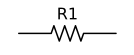

In [10]:
d = schem.Drawing()
d.add(e.RES, label='R1')
d.draw()

I like having having the '1' as a subscript. It is pretty easy to do because we can use LaTeX syntax inside the element labels in SchemDraw. To make the subscript we write ```$R_1$``` as our label text.

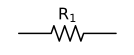

In [11]:
d = schem.Drawing()
d.add(e.RES, label='$R_1$')
d.draw()

SchemDraw adds circuit elements like drawing with a pen. Where element ends, the next element starts. To make a turn, use the ```d='down'```. 

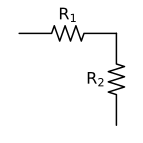

In [12]:
d = schem.Drawing()
d.add(e.RES, label='$R_1$')
d.add(e.RES, d='down', label='$R_2$')
d.draw()

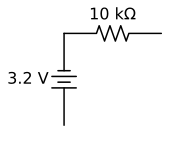

In [13]:
d = schem.Drawing()
d.add(e.BATTERY, d='up', label='3.2 V')
d.add(e.RES, d='right', label='10 k$\Omega$')
d.draw()

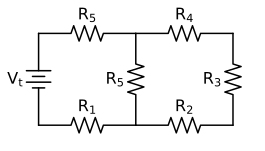

In [14]:
d = schem.Drawing()
V1 = d.add(e.BATTERY, d='down', label='$V_t$')
R1 = d.add(e.RES, d='right', label='$R_1$')
R2 = d.add(e.RES, d='right', label='$R_2$')
R3 = d.add(e.RES, d='up', label='$R_3$')
R4 = d.add(e.RES, d='left', label='$R_4$')
R5 = d.add(e.RES, d='down' , label='$R_5$')
R6 = d.add(e.RES, d='left', xy=R4.end, label='$R_5$')
d.draw()
d.save('five_resistors_two_loops.pdf')

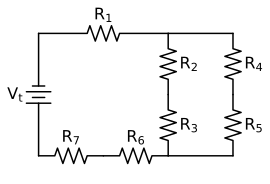

In [15]:
d = schem.Drawing(unit=2)
#start_point = d.add(e.LINE, d='right')
#
#d.add(e.LINE, d='left', l=3)
#R2 = d.add(e.RES, d='down', label='$R_2$')
#R3 = d.add(e.RES, d='down', label='$R_3$')
#d.add(e.LINE, d='right', xy=R1.end, l=3)
#R4 = d.add(e.RES, d='down', label='$R_4$')

#d.add(e.LINE, d='left', l=3)
R7 = d.add(e.RES, d='right', label='$R_7$')
R6 = d.add(e.RES, d='right', label='$R_6$')
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
R2 = d.add(e.RES, d='down', botlabel='$R_2$')
R3 = d.add(e.RES, d='down', botlabel='$R_3$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R2.start, label='$V_t$')
R1 = d.add(e.RES, d='right',xy=Vt.end, tox=R2.start, label='$R_1$')

d.draw()
d.save('seven_resistors_two_loops.pdf')

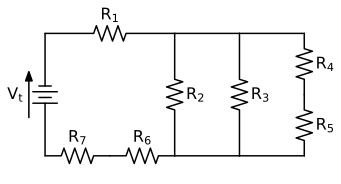

In [16]:
d = schem.Drawing(unit=2)
R7 = d.add(e.RES, d='right', label='$R_7$')
R6 = d.add(e.RES, d='right', label='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('seven_resistors_three_loops.pdf')
d.save('seven_resistors_three_loops.png')

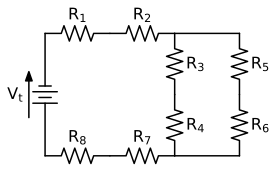

In [17]:
d = schem.Drawing(unit=2)
#start_point = d.add(e.LINE, d='right')
#
#d.add(e.LINE, d='left', l=3)
#R2 = d.add(e.RES, d='down', label='$R_2$')
#R3 = d.add(e.RES, d='down', label='$R_3$')
#d.add(e.LINE, d='right', xy=R1.end, l=3)
#R4 = d.add(e.RES, d='down', label='$R_4$')

#d.add(e.LINE, d='left', l=3)
R8 = d.add(e.RES, d='right', label='$R_8$')
R7 = d.add(e.RES, d='right', label='$R_7$')
d.add(e.LINE, d='right', l=2)
R6 = d.add(e.RES, d='up' , botlabel='$R_6$')
R5 = d.add(e.RES, d='up', botlabel='$R_5$')
d.add(e.LINE, d='left', l=2)
R3 = d.add(e.RES, d='down', botlabel='$R_3$')
R4 = d.add(e.RES, d='down', botlabel='$R_4$')
Vt = d.add(e.BATTERY, d='up', xy=R8.start, toy=R1.start, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
R1 = d.add(e.RES, d='right',xy=Vt.end, tox=R8.end, label='$R_1$')
R2 = d.add(e.RES, d='right',xy=R1.end, tox=R7.end, label='$R_2$')

d.draw()
d.save('eight_resistors_two_loops.pdf')

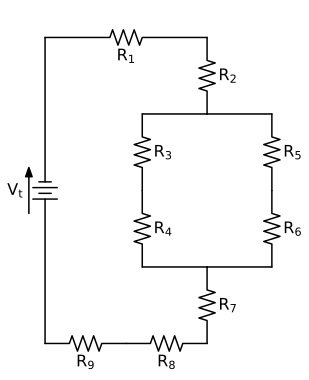

In [18]:
d = schem.Drawing(unit=2.5)
#start_point = d.add(e.LINE, d='right')
#
#d.add(e.LINE, d='left', l=3)
#R2 = d.add(e.RES, d='down', label='$R_2$')
#R3 = d.add(e.RES, d='down', label='$R_3$')
#d.add(e.LINE, d='right', xy=R1.end, l=3)
#R4 = d.add(e.RES, d='down', label='$R_4$')

#d.add(e.LINE, d='left', l=3)
R2 = d.add(e.RES, d='down', botlabel='$R_2$')
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='down', botlabel='$R_5$')
R6 = d.add(e.RES, d='down', botlabel='$R_6$')
d.add(e.LINE, d='left', l=2)
R7 = d.add(e.RES, d='down' , botlabel='$R_7$')
R8 = d.add(e.RES, d='left', botlabel='$R_8$')
R9 = d.add(e.RES, d='left', botlabel='$R_9$')
Vt = d.add(e.BATTERY, d='up', xy=R9.end, toy=R2.start, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.add(e.LINE, d='left', xy=R2.end, l=2)
R3 = d.add(e.RES, d='down', botlabel='$R_3$')
R4 = d.add(e.RES, d='down',botlabel='$R_4$')
d.add(e.LINE, d='right', l=2)
R1 = d.add(e.RES, d='right', xy=Vt.end, tox=R2.start, botlabel='$R_1$')
d.draw()
d.save('nine_resistors_one_loop.pdf')